In [ ]:
# Import Library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy import stats
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier

# EKPLORASI DATA DAN PEMBERSIHAN


Baca dataset yang akan digunakan untuk ekplorasi

In [ ]:
# Baca Dataset kendaraan_train.csv
df_kendaraan = pd.read_csv('kendaraan_train.csv')
df_kendaraan.tail()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0
285830,285831,Pria,45.0,1.0,28.0,0.0,1-2 Tahun,Pernah,36480.0,26.0,44.0,0


In [ ]:
# Cek Jumlah Null Pada Masing-Masing Kolom
print(df_kendaraan.isnull().sum())

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


Cleansing data

In [ ]:
# ubah(inisialisasi) data kategorikal jadi data numerik
change_categorical = {'Kendaraan_Rusak': {'Pernah': 1, 'Tidak': 0},
                      'Umur_Kendaraan': {'1-2 Tahun': 0, '< 1 Tahun': 1, '> 2 Tahun': 2},
                      'Jenis_Kelamin': {'Wanita':0, 'Pria':1}}
df_kendaraan = df_kendaraan.replace(change_categorical)
df_kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,30.0,1.0,33.0,1.0,1.0,0.0,28029.0,152.0,97.0,0
1,2,1.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,1.0,0.0,32733.0,160.0,119.0,0
3,4,0.0,58.0,1.0,48.0,0.0,0.0,0.0,2630.0,124.0,63.0,0
4,5,1.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0,0


In [ ]:
#ganti data nonkatagorikal dengan mean  
df_kendaraan[['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']] = df_kendaraan[['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']].fillna(df_kendaraan.mean())

In [ ]:
# Mencari Modus Pada Masing-Masing Kolom Data Kategorikal
m_sim = df_kendaraan['SIM'].mode()[0]
df_kendaraan['SIM'] = df_kendaraan['SIM'].fillna(m_sim)

In [ ]:
m_jenis_kelamin = df_kendaraan['Jenis_Kelamin'].mode()[0]
df_kendaraan['Jenis_Kelamin'] = df_kendaraan['Jenis_Kelamin'].fillna(m_jenis_kelamin)

In [ ]:
m_sudah_asuransi = df_kendaraan['Sudah_Asuransi'].mode()[0] 
df_kendaraan['Sudah_Asuransi'] = df_kendaraan['Sudah_Asuransi'].fillna(m_sudah_asuransi)

In [ ]:
m_umur_kendaraan = df_kendaraan['Umur_Kendaraan'].mode()[0] 
df_kendaraan['Umur_Kendaraan'] = df_kendaraan['Umur_Kendaraan'].fillna(m_umur_kendaraan)

In [ ]:
m_kendaraan_rusak = df_kendaraan['Kendaraan_Rusak'].mode()[0]
df_kendaraan['Kendaraan_Rusak'] = df_kendaraan['Kendaraan_Rusak'].fillna(m_kendaraan_rusak)

In [ ]:
df_kendaraan.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Mencari persebaran pelanggan pada dataset kendaraan_train.csv

In [ ]:
#pelanggan tertarik dan tidak
tipe1 = df_kendaraan['Tertarik'].value_counts().sum()
tipe2 = df_kendaraan['Tertarik'].value_counts()
persentase_tertarik = tipe2[1] / tipe1 * 100
persentase_tidak_tertarik = 100 - persentase_tertarik

print("Pelanggan Tertarik       :",tipe2[1])
print("Pelanggan Tidak Tertarik :",tipe2[0])

Pelanggan Tertarik       : 35006
Pelanggan Tidak Tertarik : 250825


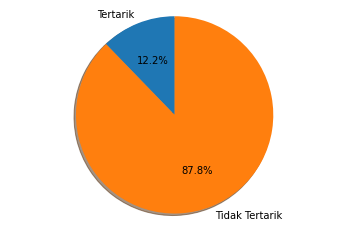

In [ ]:
# Visualisasi data pelanggan dalam bentuk pie chart

labels = 'Tertarik', 'Tidak Tertarik'
sizes = [persentase_tertarik, persentase_tidak_tertarik]
explode = (0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Data preprocessing

In [ ]:
#  Normalisasi data menggunakan MinMax Scaling
scaler = MinMaxScaler()
df_kendaraan[['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan','Lama_Berlangganan']] = scaler.fit_transform(df_kendaraan[
                                                            ['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan','Lama_Berlangganan']])

df_kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0.0,0.153846,1.0,0.634615,1.0,0.5,0.0,0.047251,0.932099,0.301038,0
1,2,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0
2,3,1.0,0.015385,1.0,0.884615,1.0,0.5,0.0,0.056002,0.981481,0.377163,0
3,4,0.0,0.584615,1.0,0.923077,0.0,0.0,0.0,0.000000,0.759259,0.183391,0
4,5,1.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678,0


In [ ]:
# pisahkan Aribut dan Label(tertarik/tidak tertarik) Pada Dataset Kendaraan
atribut = df_kendaraan[['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan','Lama_Berlangganan']]
label = df_kendaraan['Tertarik']

Splitting data

In [ ]:
# pisahkan data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(atribut, label, test_size=0.3, random_state=1)

# Implementasi Decision Tree

Pemodelan

In [ ]:
# Buat Model Decision Tree
dtc = DecisionTreeClassifier()

In [ ]:
# Train Random Decision Tree
train_model = dtc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = train_model.predict(X_test)

In [ ]:
# Membuat tabel Confusi Matrix
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix

Predicted,0,1
Actual,,
0,67283,7903
1,7277,3287


In [ ]:
# Evaluasi dengan menggunakan Validation(Accuracy), F1_Score, dan Recall
testing_accuracy = (100*metrics.accuracy_score(y_test, y_pred))
f1_score = (100*metrics.f1_score(y_test, y_pred))
recall = (100*metrics.recall_score(y_test, y_pred))
print("Validation Accuracy :  {}%".format(np.format_float_positional(testing_accuracy, precision=3)))
print("F1-Score            :  {}%".format(np.format_float_positional(f1_score, precision=3)))
print("Recall Score        :  {}%".format(np.format_float_positional(recall, precision=3)))

Validation Accuracy :  82.297%
F1-Score            :  30.22%
Recall Score        :  31.115%


Hapus outlier

In [ ]:
# Definisikan nilai Z score
z = np.abs(stats.zscore(df_kendaraan))
df_kendaraan_o = df_kendaraan[(z < 3).all(axis=1)]

In [ ]:
print("Ukuran Dataset Sebelum Outlier diHilangkan",df_kendaraan.shape)
print("Ukuran Dataset Sesudah Outlier diHilangkan",df_kendaraan_o.shape)

Ukuran Dataset Sebelum Outlier diHilangkan (285831, 12)
Ukuran Dataset Sesudah Outlier diHilangkan (283619, 12)


splitting data lagi

In [ ]:
# Memisahkan Atribut dan Label
atribut_rem_outlier = df_kendaraan_o[['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan','Lama_Berlangganan']]
label_rem_outlier = df_kendaraan_o['Tertarik']

In [ ]:
print(atribut_rem_outlier.shape)
print(label_rem_outlier.shape)

(283619, 10)
(283619,)


In [ ]:
# Splitting  Pembagian Training Set 70% dan Testing Set 30%)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(atribut_rem_outlier, label_rem_outlier, test_size=0.3, random_state=1)

In [ ]:
print('Data Train Atribut   :',len(X_train_rus))
print('Data Train Label     :',len(y_train_rus))
print('')
print('Data Validasi Atribut:',len(X_test_rus))
print('Data Validasi Label  :',len(y_test_rus))

Data Train Atribut   : 198533
Data Train Label     : 198533

Data Validasi Atribut: 85086
Data Validasi Label  : 85086


In [ ]:
Counter(y_train_rus)

Counter({0: 174186, 1: 24347})

penanganan imbalance dataset

In [ ]:
rus_kendaraan = SMOTEENN()
atribut_rus, label_rus = rus_kendaraan.fit_resample(X_train_rus, y_train_rus)

In [ ]:
#perbandingn sebelum dan sesudah resample
print('Ukuran Dataset before Resample   :', Counter(y_train_rus))
print('Ukuran Dataset after Resample    :', Counter(label_rus))

Ukuran Dataset before Resample   : Counter({0: 174186, 1: 24347})
Ukuran Dataset after Resample    : Counter({1: 151767, 0: 124279})


In [ ]:
# Ubah data array menjadi dataframe
atribut_rus_df= pd.DataFrame(atribut_rus, columns = ['Jenis_Kelamin','Umur', 'SIM','Kode_Daerah','Sudah_Asuransi','Umur_Kendaraan','Kendaraan_Rusak','Premi','Kanal_Penjualan','Lama_Berlangganan'])
label_rus_df = pd.DataFrame(label_rus, columns=['Tertarik'])

mencari feature dengan importance tertinggi

In [ ]:
# Definisikan Model Decision Tree Classifier
model = DecisionTreeClassifier()

# fit the model
model.fit(atribut_rus, label_rus_df.values.ravel())

# dapatkan fitur yang penting
importance = model.feature_importances_

# Tampilkan nilai feature importance
for i,col in enumerate(X_train_rus.columns):
    print('Feature: {}-{}'.format(i,col))

print('---------------------------------------')

for i,v in enumerate(importance):
	  print('Feature: {}, Score: {}'.format(i,np.format_float_positional(v, precision=3)))

Feature: 0-Jenis_Kelamin
Feature: 1-Umur
Feature: 2-SIM
Feature: 3-Kode_Daerah
Feature: 4-Sudah_Asuransi
Feature: 5-Umur_Kendaraan
Feature: 6-Kendaraan_Rusak
Feature: 7-Premi
Feature: 8-Kanal_Penjualan
Feature: 9-Lama_Berlangganan
---------------------------------------
Feature: 0, Score: 0.01
Feature: 1, Score: 0.123
Feature: 2, Score: 0.
Feature: 3, Score: 0.048
Feature: 4, Score: 0.089
Feature: 5, Score: 0.006
Feature: 6, Score: 0.564
Feature: 7, Score: 0.048
Feature: 8, Score: 0.039
Feature: 9, Score: 0.073


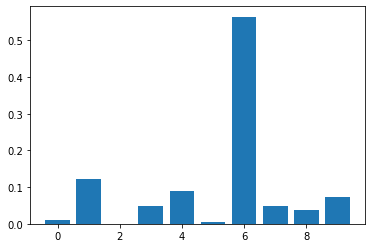

In [ ]:
# Visualisasikan Fitur yang Penting
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Memakai feature yang memiliki tingkat Importance yang paling tinggi

atribut_rus_df = atribut_rus_df[['Umur','Sudah_Asuransi','Kendaraan_Rusak']]
X_test_rus = X_test_rus[['Umur','Sudah_Asuransi','Kendaraan_Rusak']]

Tunning Hyperparameter

In [ ]:
# Menetapkan Hyperparameter
dtc = DecisionTreeClassifier()
parameters = {
    "criterion":["entropy", "gini"],
    "max_depth":[2,4,8,16,32,None],
}

In [ ]:
# Tuning Hyperparameter
cv = GridSearchCV(dtc,parameters,cv=5)
cv.fit(atribut_rus_df,label_rus_df.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 16, 32, None]})

In [ ]:
# Output Tuning Hyperpameter
def display(results):
    print(f'Parameter Terbaik: {results.best_params_}')
display(cv)

Parameter Terbaik: {'criterion': 'gini', 'max_depth': 32}


menguji hasil evaluasi

In [ ]:
# buat objek decision tree Classiifier
dtc = DecisionTreeClassifier(criterion="entropy")

# Train decision tree classifier
train_model_rus = dtc.fit(atribut_rus_df,label_rus_df.values.ravel())

# Predict the response for test dataset
y_pred_rus = train_model_rus.predict(X_test_rus)

In [ ]:
# Evaluasi Menggunakan Validation(Accuracy), F1_Score, dan Recall

testing_accuracy = (100*metrics.accuracy_score(y_test_rus, y_pred_rus))
f1_score = (100*metrics.f1_score(y_test_rus, y_pred_rus))
recall = (100*metrics.recall_score(y_test_rus, y_pred_rus))

print("Validation Accuracy  : {}%".format(np.format_float_positional(testing_accuracy, precision=3)))
print("Recall Score         : {}%".format(np.format_float_positional(recall, precision=3)))
print("F1-Score             : {}%".format(np.format_float_positional(f1_score, precision=3)))

Validation Accuracy  : 73.976%
Recall Score         : 82.422%
F1-Score             : 43.569%


In [ ]:
# buat tabel konfusi matrix

data = {'y_Actual':    y_test_rus.values.ravel(),
        'y_Predicted': y_pred_rus
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix

Predicted,0,1
Actual,,
0,54395,20320
1,1823,8548


# Test set


cleansing data

In [ ]:
# Membaca Data Kendaraan_Test
df_kendaraan_tes = pd.read_csv('kendaraan_test.csv')

In [ ]:
# Mengganti Nilai Data Kategorikal Yang Belum Berbentuk Angka Menjadi Numerik
df_kendaraan_tes= df_kendaraan_tes.replace(change_categorical)
df_kendaraan_tes.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,0,1,46963,26,145,0
1,1,22,1,47,1,1,0,39624,152,241,0
2,1,24,1,28,1,1,0,110479,152,62,0
3,1,46,1,8,1,0,0,36266,124,34,0
4,1,35,1,23,0,0,1,26963,152,229,0


In [ ]:
#Ganti data nonKategorikal dengan mean  
df_kendaraan_tes[['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']] = df_kendaraan_tes[['Umur','Kode_Daerah','Premi','Kanal_Penjualan','Lama_Berlangganan']].fillna(df_kendaraan_tes.mean())


# Cari modus pada masing-masing kolom data kategorikal
modus_jenis_kelamin = df_kendaraan_tes['Jenis_Kelamin'].mode()[0]
modus_sim = df_kendaraan_tes['SIM'].mode()[0]
modus_sudah_asuransi = df_kendaraan_tes['Sudah_Asuransi'].mode()[0] 
modus_umur_kendaraan = df_kendaraan_tes['Umur_Kendaraan'].mode()[0] 
modus_kendaraan_rusak = df_kendaraan_tes['Kendaraan_Rusak'].mode()[0]

#Ganti data kategorikal dengan modus
df_kendaraan_tes['Jenis_Kelamin'] = df_kendaraan_tes['Jenis_Kelamin'].fillna(modus_jenis_kelamin)
df_kendaraan_tes['SIM'] = df_kendaraan_tes['SIM'].fillna(modus_sim)
df_kendaraan_tes['Sudah_Asuransi'] = df_kendaraan_tes['Sudah_Asuransi'].fillna(modus_sudah_asuransi)
df_kendaraan_tes['Umur_Kendaraan'] = df_kendaraan_tes['Umur_Kendaraan'].fillna(modus_umur_kendaraan)
df_kendaraan_tes['Kendaraan_Rusak'] = df_kendaraan_tes['Kendaraan_Rusak'].fillna(modus_kendaraan_rusak)

data preprocessing

In [ ]:
# Preprocessing data menggunakan fungsi MinMax Scaler
scaler = MinMaxScaler()
df_kendaraan_tes[['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan','Lama_Berlangganan']] = scaler.fit_transform(df_kendaraan_tes[
                                                            ['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah','Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan','Lama_Berlangganan']])

df_kendaraan_tes.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.446154,1.0,0.153846,0.0,0.0,1.0,0.082475,0.154321,0.467128,0
1,1.0,0.030769,1.0,0.903846,1.0,0.5,0.0,0.068822,0.932099,0.799308,0
2,1.0,0.061538,1.0,0.538462,1.0,0.5,0.0,0.200636,0.932099,0.179931,0
3,1.0,0.400000,1.0,0.153846,1.0,0.0,0.0,0.062575,0.759259,0.083045,0
4,1.0,0.230769,1.0,0.442308,0.0,0.0,1.0,0.045268,0.932099,0.757785,0


In [ ]:
# Identifikasi keseimbangan data uji
Counter(df_kendaraan_tes['Tertarik'])

Counter({0: 41778, 1: 5861})

In [ ]:
# Pisahkan Label dan Atribut  Dataset Kendaraan_Test
atribut_test = df_kendaraan_tes[['Umur','Sudah_Asuransi','Kendaraan_Rusak']]
label_test = df_kendaraan_tes['Tertarik']

Prediksi dataset

In [ ]:
# Predict the response for Kendaraan_Test
y_pred_test = train_model_rus.predict(atribut_test)

In [ ]:
Counter(y_pred_test)

Counter({0: 32067, 1: 15572})

In [ ]:
#Tabel Konfusi Matrix
data = {'y_Actual':    label_test,
        'y_Predicted': y_pred_test
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix

Predicted,0,1
Actual,,
0,30926,10852
1,1141,4720


In [ ]:
# Evaluasi Menggunakan Validation(Accuracy), F1_Score, dan Recall

testing_accuracy = (100 * metrics.accuracy_score(label_test, y_pred_test))
f1_score = (100 * metrics.f1_score(label_test, y_pred_test,average='binary',labels=np.unique(y_pred)))
recall = (100 * metrics.recall_score(label_test, y_pred_test))


print("Testing Accuracy : {} %".format(np.format_float_positional(testing_accuracy, precision=3)))
print("F1-Score         : {} %".format(np.format_float_positional(f1_score, precision=3)))
print("Recall Score     : {} %".format(np.format_float_positional(recall, precision=3)))

Testing Accuracy : 74.825 %
F1-Score         : 44.044 %
Recall Score     : 80.532 %


dataset baru yang telah di olah menggunakan decision tree

In [ ]:
new_data_train = df_kendaraan
new_data_test = atribut_test
new_predict = confusion_matrix

new_data_train.to_csv('data_train_new.csv', index=False)
new_data_test.to_csv('data_test_decisiontree.csv', index=False)
new_predict.to_csv('data_prediksi.csv', index=False)